Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings 
filterwarnings("ignore")

In [2]:
#statistical Testing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\FELICITA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [79]:
#Evalunation Matrix Libraries
from sklearn.metrics import mean_squared_error,r2_score
#scaling library
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV

In [4]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\Walmart_Store_sales.csv")

In [5]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
data.shape

(6435, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Exploratory Data Analysis

In [46]:
def tar_fea(i):
    print("Data Type\n",data[i].dtype)
    print("Describing the data\n",data[i].describe())
    
    sns.boxplot(data[i])
    plt.xticks(rotation=90)
    plt.show()
    
    sns.distplot(data[i])
    plt.show()    

In [47]:
def cat_fea(i):
    print("Data Type\n",data[i].dtype)
    print("Null values = ",data.Store.isnull().sum())
    print("Unique Datas\n",data[i].unique())
    print("Describing the data\n",data[i].describe())
    print("Count of each unique datas\n",data[i].value_counts())

    sns.countplot(data[i])
    plt.show()
    data.groupby(i)["Weekly_Sales"].mean().plot(kind="bar")
    plt.show()
    sns.scatterplot(x=i,y="Weekly_Sales",data=data)
    plt.show()   

In [48]:
def reg_fea(i):
    print("Data Type\n",data[i].dtype)
    print("Null values = ",data.Store.isnull().sum())
    print("Describing the data\n",data[i].describe())

    sns.boxplot(data[i])
    plt.show()
    sns.scatterplot(x=i,y="Weekly_Sales",data=data)
    plt.show()

    print(np.corrcoef(data[i],data.Weekly_Sales))

In [49]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

In [50]:
data[data.duplicated()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year


In [51]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')

Target Variable

Data Type
 float64
Describing the data
 count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64


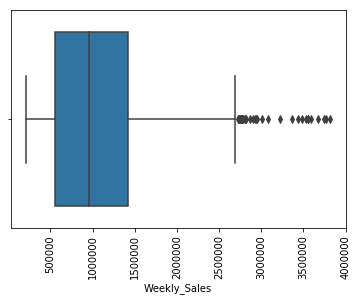

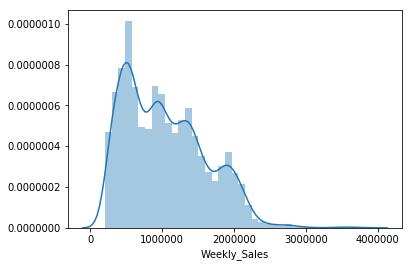

In [52]:
tar_fea("Weekly_Sales")

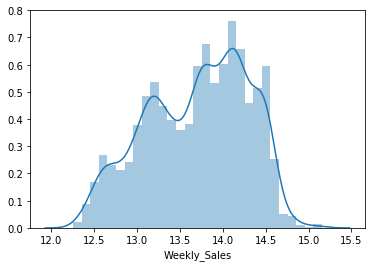

In [55]:
sns.distplot(np.log(data.Weekly_Sales))

In [56]:
data.Weekly_Sales=np.log(data.Weekly_Sales)

Store

Data Type
 int64
Null values =  0
Describing the data
 count    6435.000000
mean       23.000000
std        12.988182
min         1.000000
25%        12.000000
50%        23.000000
75%        34.000000
max        45.000000
Name: Store, dtype: float64


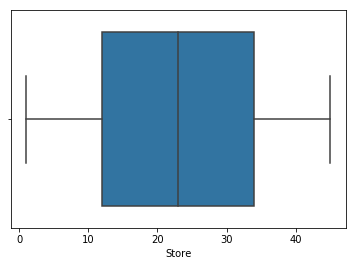

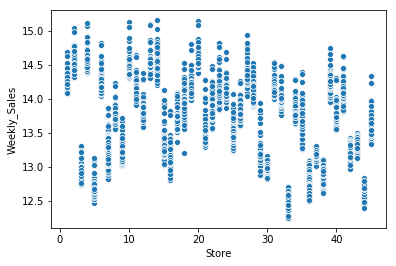

[[ 1.         -0.29478584]
 [-0.29478584  1.        ]]


In [57]:
reg_fea("Store")

Date

In [16]:
data["Day"]=pd.to_datetime(data.Date,format="%d-%m-%Y").dt.day

In [17]:
data["Month"]=pd.to_datetime(data.Date,format="%d-%m-%Y").dt.month
data["Year"]=pd.to_datetime(data.Date,format="%d-%m-%Y").dt.year

In [18]:
data.drop("Date",axis=1,inplace=True)

In [19]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


Day

Data Type
 int64
Null values =  0
Describing the data
 count    6435.000000
mean       15.678322
std         8.755780
min         1.000000
25%         8.000000
50%        16.000000
75%        23.000000
max        31.000000
Name: Day, dtype: float64


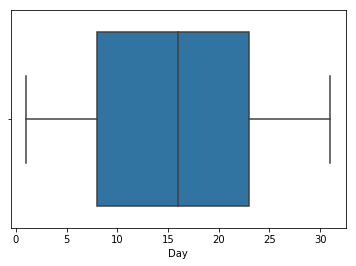

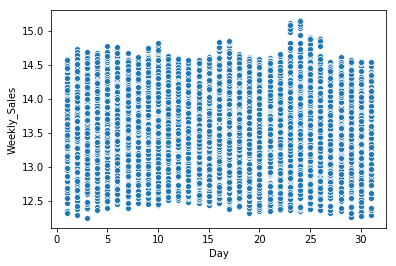

[[ 1.         -0.02220634]
 [-0.02220634  1.        ]]


In [58]:
reg_fea("Day")

Month

Data Type
 int64
Null values =  0
Describing the data
 count    6435.000000
mean        6.447552
std         3.238308
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: Month, dtype: float64


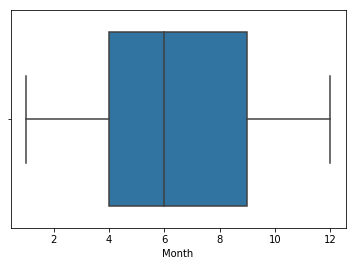

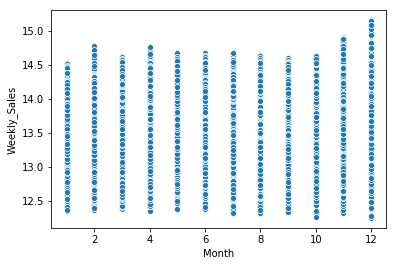

[[1.         0.05304193]
 [0.05304193 1.        ]]


In [59]:
reg_fea("Month")

Year

Data Type
 int64
Null values =  0
Describing the data
 count    6435.000000
mean     2010.965035
std         0.797019
min      2010.000000
25%      2010.000000
50%      2011.000000
75%      2012.000000
max      2012.000000
Name: Year, dtype: float64


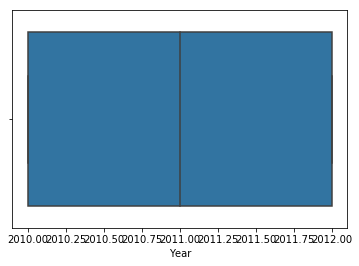

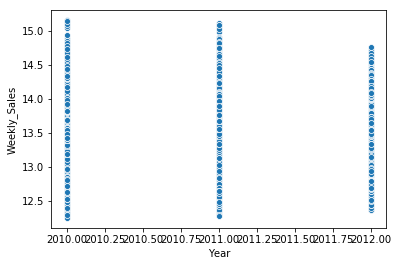

[[ 1.         -0.00785421]
 [-0.00785421  1.        ]]


In [60]:
reg_fea("Year")

Holiday_Flag

In [23]:
data.Holiday_Flag=data.Holiday_Flag.astype("object")

Data Type
 object
Null values =  0
Unique Datas
 [0 1]
Describing the data
 count     6435
unique       2
top          0
freq      5985
Name: Holiday_Flag, dtype: int64
Count of each unique datas
 0    5985
1     450
Name: Holiday_Flag, dtype: int64


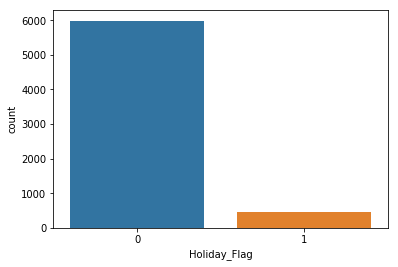

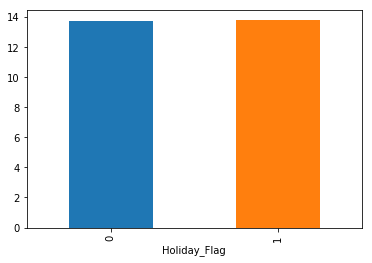

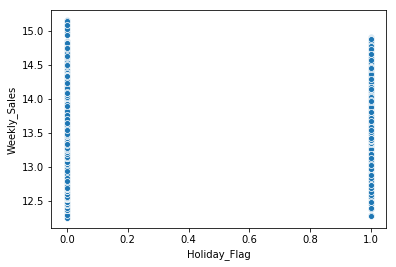

In [61]:
cat_fea("Holiday_Flag")

Temperature

Data Type
 float64
Null values =  0
Describing the data
 count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64


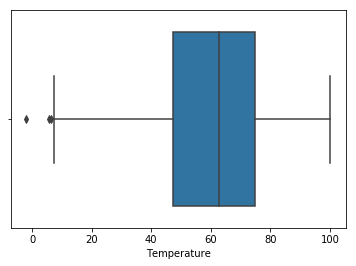

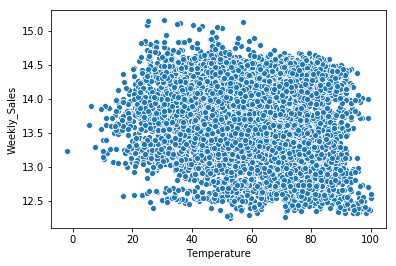

[[ 1.         -0.09251897]
 [-0.09251897  1.        ]]


In [62]:
reg_fea("Temperature")

Fuel_Price

Data Type
 float64
Null values =  0
Describing the data
 count    6435.000000
mean        3.358607
std         0.459020
min         2.472000
25%         2.933000
50%         3.445000
75%         3.735000
max         4.468000
Name: Fuel_Price, dtype: float64


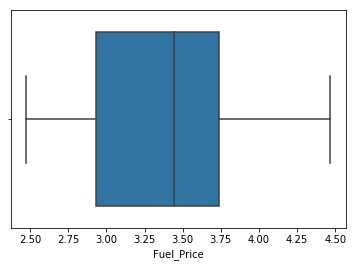

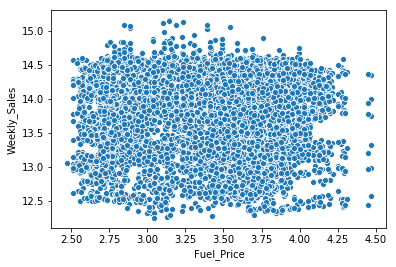

[[1.        0.0187707]
 [0.0187707 1.       ]]


In [63]:
reg_fea("Fuel_Price")

CPI

Data Type
 float64
Null values =  0
Describing the data
 count    6435.000000
mean      171.578394
std        39.356712
min       126.064000
25%       131.735000
50%       182.616521
75%       212.743293
max       227.232807
Name: CPI, dtype: float64


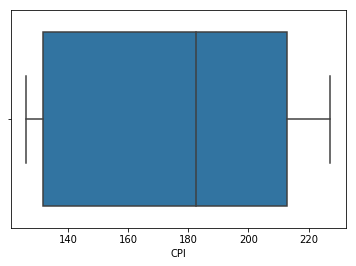

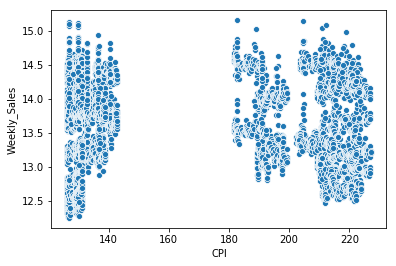

[[ 1.         -0.07748055]
 [-0.07748055  1.        ]]


In [64]:
reg_fea("CPI")

Unemployment

Data Type
 float64
Null values =  0
Describing the data
 count    6435.000000
mean        7.999151
std         1.875885
min         3.879000
25%         6.891000
50%         7.874000
75%         8.622000
max        14.313000
Name: Unemployment, dtype: float64


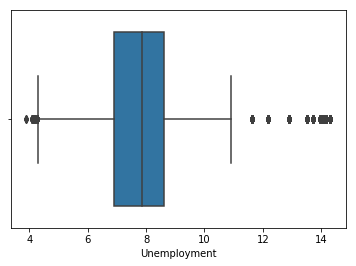

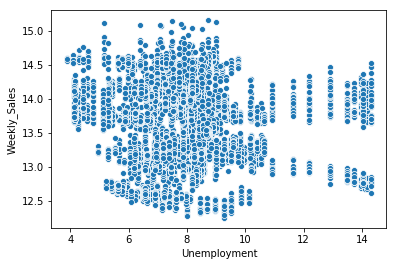

[[ 1.         -0.07981686]
 [-0.07981686  1.        ]]


In [65]:
reg_fea("Unemployment")

In [73]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')

In [75]:
X=data.drop("Weekly_Sales",axis=1)
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,0,46.50,2.625,211.350143,8.106,5,3,2010


In [76]:
y=data.Weekly_Sales
y.head()

0    14.312455
1    14.311400
2    14.292966
3    14.158907
4    14.256862
Name: Weekly_Sales, dtype: float64

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5148, 9), (1287, 9), (5148,), (1287,))

In [78]:
DR=DecisionTreeRegressor()
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 4.176672534114235e-05
Test RMSE = 0.10318869831368277
Train R2_square = 0.9999999948816691
Test R2_square = 0.9709769291211532


In [96]:
max_depth=list(range(5,50,5))
min_samples_split=list(range(2,20,2))
max_features=[None,"auto","sqrt","log2"]
DR_CV={"max_depth":max_depth,"min_samples_split":min_samples_split,"max_features":max_features}
DR_model = RandomizedSearchCV(estimator = DR,param_distributions = DR_CV,cv=4,random_state = 0)

In [97]:
DR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=20, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'max_features': [None, 'auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [98]:
DR_model.best_params_

{'min_samples_split': 14, 'max_features': 'auto', 'max_depth': 25}

In [99]:
DR=DecisionTreeRegressor(max_depth=20,min_samples_split=12,max_features="auto")
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.05852757237871571
Test RMSE = 0.10143600517228361
Train R2_square = 0.9899494800858205
Test R2_square = 0.9719544882702544


In [101]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.03857164240517767
Test RMSE = 0.0909771594246881
Train R2_square = 0.9956348037786501
Test R2_square = 0.9774397535349694


In [102]:
n_estimators=list(range(50,500,50))
max_depth=list(range(5,50,5))
min_samples_split=list(range(2,20,2))
max_features=[None,"auto","sqrt","log2"]
RF_CV={"max_depth":max_depth,"min_samples_split":min_samples_split,"max_features":max_features,"n_estimators":n_estimators}
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = RF_CV,cv=4,random_state = 0)

In [103]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'max_features': [None, 'auto', 'sqrt', 'log2'], 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [104]:
RF_model.best_params_

{'n_estimators': 350,
 'min_samples_split': 4,
 'max_features': None,
 'max_depth': 45}

In [105]:
RF=RandomForestRegressor(n_estimators=350,min_samples_split=4,max_features=None,max_depth=45)
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.03807533261238996
Test RMSE = 0.0872047443103226
Train R2_square = 0.9957464169301237
Test R2_square = 0.9792719083375298


In [107]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [108]:
print(selection.feature_importances_)

[0.69133584 0.00390046 0.0166688  0.01072189 0.15667208 0.08871134
 0.00790682 0.01388996 0.01019281]


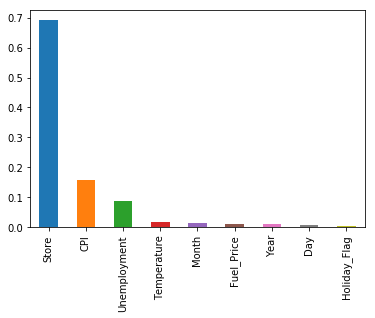

In [109]:
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [123]:
X_imp = X[feat_importances.nlargest(5).index]

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X_imp,y,test_size=.20,random_state=14)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5148, 5), (1287, 5), (5148,), (1287,))

In [125]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'max_features': [None, 'auto', 'sqrt', 'log2'], 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [126]:
RF_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 14,
 'max_features': None,
 'max_depth': 20}

In [130]:
RF=RandomForestRegressor(n_estimators=400,min_samples_split=14,max_features=None,max_depth=20)
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.07256400385145327
Test RMSE = 0.09816786263488461
Train R2_square = 0.984550658170467
Test R2_square = 0.9737325590158128


In [132]:
pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_test_pre),'Variance':np.exp(y_test)-np.exp(y_test_pre)}).head()

,Actual,Predicted,Variance
3024,1120259.71,1.014608e+06,105651.945579
997,505830.56,5.065301e+05,-699.494857
641,329183.92,3.071705e+05,22013.418989
246,1660906.14,1.820269e+06,-159362.443458
4954,880576.33,9.815740e+05,-100997.663029


Random Forest gives high accuracy for both test and train data 